# CM3015, Machine Learning and Neural Networks
# End of term coursework submission [002]

## 1 .Introduction

This report utilizes the **Universal Workflow of Machine Learning**[<a href="#ref-dlwp">1</a>] to build a final model that produces the best results of the chosen dataset using exclusively `Dense` and `Dropout` layers as outlined by the instructions for this project. 

## 2. Problem & Dataset

Classifying raw images into categories is a highly valuable task, with numerous applications accross various industries[3]. One prevalent image classification challenge is the multi-class, single-label classification problem, where each document (in this case, an image) is assigned a single class label.

Formally:

- $\hat{y} = f(X) = \textbf{argmax } g(\theta, X)_{[k]}, \forall{k \in K=\{ 0...|classes| \}}$, where:
  - $X$ is the input image
  - $f$ is the labeller function
  - $g$ is the model
  - $\theta$ are the trainable parameters of the model
, 
where:
 is the input image
 is the labeller function
 is the model
 are the trainable parameters of the model

Nonstationary challenges are a concern in machine learning models, where the model's ability to remember patterns is limited to those present in the training data. For example, a model designed to predict snowfall amounts during winter might perform poorly if evaluated using test data collected in the following spring. However, since `MNIST` Digits represents a stationary problem, it is not affected by such issues.

The `MNIST` dataset is available in the **Tensorflow Datasets Catalog**[<a href="#ref-mnist">4</a>]. It is a good example of an image classification problem that pertains to hand-written digits. It consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9), along with their corresponding labels indicating the digit they represent. It's a set of 60,000 training images plus 10,000 test images assembled by the National Institue of Standards and Technology.

### 2.1 Hypotheses

A viable hypothesis for this dataset is that it will be possible to predict the output using the input, as it is plausable that there is a predictive relationship between the pixel values of the images and their corresponding input labels..

Another hypothesis is that Tensorflow will allow us to evaluate the relationships between the inputs and the outputs of these images.

### 2.2 Jupyter Environment Setup

The following section handles the installation of all required dependencies used when running the experimentation with **Tensorflow** and **Keras**<br />

In [1]:
# system
import os
import pathlib

# Mathematical Computation
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline

import matplotlib.pyplot as plt #used for plotting and analyzing data

#used for image display
import PIL 
from PIL import Image

from pathlib import Path
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

from tqdm import tqdm

# Machine Learning Library
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import (layers, models, losses, optimizers, regularizers, callbacks)
from typing import List, Dict, Tuple, Callable, Union, Optional, Any
from tensorflow.keras.datasets import mnist
from collections import Counter
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


import functools
import itertools
import os

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import tensorflow_datasets as tfds


# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This makes the results reproduceable
tf.random.set_seed(30)
np.random.seed(30)

In [2]:
# Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#get the shape of the training images
X_train.shape

(60000, 28, 28)

In [4]:
#get the total number of training labels
len(y_train)

60000

In [5]:
#get the shape of the testing images
X_test.shape

(10000, 28, 28)

In [6]:
#get the total number of testing labels
len(y_test)

10000

## 3. Measure of Success

The MNIST dataset provided by Tensorflow has a size of 60000 training images with 10000 training images. The classes are distributed evenly so each class posseses aproximately 6000 images (training dataset) and 1000 images (testing dataset) each.

The number of examples per class is balanced, allowing the `accuracy` metric to be suitable. The **`accuracy score`**, (higher=better) is given by the following equation:

$Accuracy = \frac{Correct}{Total} = \frac{TP + TN}{TP + FP + TN + FN}$

Precision and recall are still important metrics to consider when approaching problems such as this, however they are better used for problems where the class distribution is more uneven.  Another good metric to measure success for this type of project is area under the receiver operating characteristic curve (ROC AUC). But this will not be used in this report.

## 4. Evaluation Protocol

**Hold-out** validation will be performed to assess the performance of the model during the training process without using the testing data set. The hold-out validation set is a subset of the training data that isn't used in training, but instead reserved for evaluating performance during training epochs. This allows us to effectively analyse and evaluate the models performance during various training epochs. This can give an indication on how well the model evaluates new and unseen data. This can assist with overfitting. **Hold-out** test-sets are the ideal strategy when the data is sufficient, which is the case for the `MNIST` dataset. This dataset includes $10,000$ data points that have been designed to evaluate the model.

Thus, the **Evaluation Protocol** chosen for this report is the **Hold-out validation set**[<a href="#ref-fc-dlwp">1</a>].


## 5. Preparing the data

Now that it is clear what we are training on, what the model has been optimized for and how to evaluate the approach, it is time to format the data in a way that it can effectively be fed into a machine-learning model.

- The data needs to be formatted as tensors
- The values of the tensors must be scaled to very small values

### 5.1 MNIST Evaluation

Let's do an initial glance at the data contained in the MNIST database

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


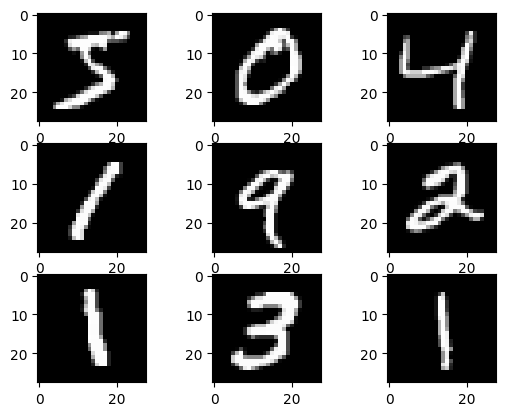

In [7]:
# Dataset Summary
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# Sample plot showing images in a (28, 28) 2d array
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [8]:
def display_img_label(num_images, data):
    """
    Display the images with their labels
    
    input:
    num_images: number of images to show
    data: the training or test data set
    output:
    a plt showing the images next to the correct labels
    """
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.show()

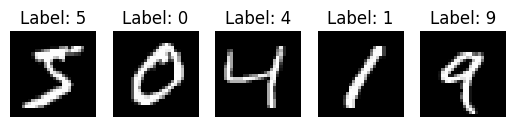

In [9]:
# Display a few images from the training set with their labels
display_img_label(5, X_train)

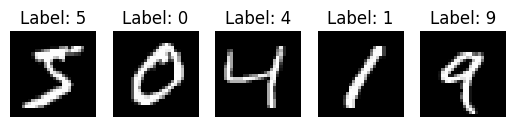

In [10]:
# Display a few images from the testing set with their labels
display_img_label(5, X_test)

### 5.2 Preparing the image data

Initially, the training images were in an array of a shape (60000, 28, 28) of type uint8 with values in the interval [0, 255]. This data needs to be preprocessed by scaling it so that all values fall inside the [0, 1] interval and reshaping it into the shape the network anticipates. We need to convert it to a float32 array with values between 0 and 1, with the shape of (60000, 28 * 28).

In [11]:
# normalise pixels from [0, 255] to [0, 1]
X_train, X_test = X_train/255, X_test/255

### 5.3 One-Hot Encoding

One-hot encoding is one the most common and basic ways to turn tokens into vectors. The one-hot encoded vector of the ground-truth, as well as the vector of softmax output provide us with probability distributions. And given that we have 2 probability distributions, we can use the differentiable loss function called **`cross entropy loss`**,<br />
derived from the Information Theory field[<a href="#ref-ct-eoit2nd-pp80">6</a>], to calculate the error in our prediction. This helps us represent categorical variables as binary vectors. In machine learning, particularly in classification tasks like MNIST digit recognition, it's common to represent labels (ground-truth) as one-hot encoded vectors. This means that each label is represented as a binary vector where only one element is 1, corresponding to the class, and all other elements are 0.

$CCE = L(y, \hat{y}) = -\sum^{N}_{n=1}\sum^{K}_{k=1} y_{nk} \log{\hat{y}_{nk}}$, where:

- $y$ is a vector representing the one-hot encoded label
- $\hat{y}$ is a vector of the probability distribution output either by a `softmax` output, or similar

By minimising $CCE$, we fit a model that will produce a $\hat{y}$ the is the closest possible to the ground-truth $y$. This is achieved by allowing the model to learn to produce predicted distributions ($\hat{y}$) that are as close as possible to the ground-truth labels ($y$).

**Important:** in order to use the `categorical_crossentropy` loss function, the ground-truth labels must be one-hot encoded first. Alternatively, the
`sparse_categorical_crossentropy` could have been used to avoid the requirement for prior one-hot encoding of labels as it works with integer-encoded labels.

In [12]:
cce = losses.CategoricalCrossentropy()
[
    cce(y_true=np.array([0.0, 0.0, 1.0, 0.0]), y_pred=np.array([0.0, 0.0, 1.0, 0.0])),
    cce(y_true=np.array([0.0, 0.0, 1.0, 0.0]), y_pred=np.array([0.0, 1.0, 0.0, 0.0])),
    cce(y_true=np.array([0.0, 0.0, 1.0, 0.0]), y_pred=np.array([0.0, 0.5, 0.5, 0.0])),
]


[<tf.Tensor: shape=(), dtype=float32, numpy=1.192093e-07>,
 <tf.Tensor: shape=(), dtype=float32, numpy=16.118095>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6931472>]

### 5.3.1 Preparing the labels

In [13]:
# one hot encoded target values
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [14]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=30)

Now we are ready to move on to the next step by developing a model that does better than the baselin

## 6. Developing a model that does better than baseline

The **Universal Workflow of Machine Learning**[<a href="#ref-dlwp">1</a>] requires us to develop a baseline model with _statistical power_, which is a small/simple model that beats a random classifier. Given that `MNIST` has 10 classes, a uniformily random classifier is likely to perform at $10%$.

Classes have been designed in this portion of the report to ensure that no repetition of code occurs that could lead to errors and affect the overall results of the model.

3 key choices have to be made pertaining to building the first working model:

1. **Last-Layer Activation**: This establishes constraints on the network's output. For this model `sofmax` will be used.
2. **Loss function**: A suitable loss function must be selected according to the problem being solved. For this first model we will use `categorical_crossentropy`
3. **Optimization Configuration**: For this model we will be using `rmsprop` and its learning rate

### 6.1 Naive Baseline

A Naive Majority Class Baseline will be created before a model is developed for it. The majority class baseline predicts that the majority class amongst all other instances will be the correct prediction in a classification problem. For example, if the digit 3 had the most classes of samples in the training set, the model will predict 3 for all instances.

In [15]:
# Convert one-hot encoded labels back to int labels
y_train_labels = np.argmax(y_train, axis=1)

# Count the number of samples for each label in the training set
most_common_label = Counter(y_train_labels).most_common(1)[0][0]
most_common_count = Counter(y_train_labels).most_common(1)[0][1]

#Calculate the naive baseline accuracy
naive_baseline_accuracy = most_common_count / len(y_test)

#Print the label with the most samples and the naive baseline accuracy:
print("Digit with the most frequent occurances in images:")
print("Digit: %s, with a total of %s samples" % (most_common_label, most_common_count))

print("Naive Baseline Accuracy: {:0.2f}%".format(naive_baseline_accuracy * 100))

Digit with the most frequent occurances in images:
Digit: 1, with a total of 5403 samples
Naive Baseline Accuracy: 54.03%


The baseline accuracy has been establish, now the model can be built. Firsly we need to set the parameters. Then we set the EarlyStopping callback which is particularly useful to halt the training process at the right time, ensuring the model generalizes well without unnecessarily extending training time.

In [16]:
# Set the input dimension of the images. 
# This is used to reshape the images or define the input layer of the model.
# Here, it indicates that each image is 28 pixels by 28 pixels.
INPUT_DIMENSION = (28, 28)

# Define the number of output classes for the classification.
# This means the model will predict one out of 10 classes, suitable for datasets like MNIST.
OUTPUT_CLASSES = 10

# Specify the optimizer to be used during model training.
# 'rmsprop' is chosen here, which is a good general-purpose optimizer.
OPTIMIZER = 'rmsprop'

# Define the loss function to be used.
# 'categorical_crossentropy' is suitable for multi-class classification tasks.
LOSS_FUNC = 'categorical_crossentropy'

# List the metrics to be monitored during training. 
# Here, 'categorical_accuracy' is used to measure how often predictions match the one-hot encoded labels.
METRICS = ['categorical_accuracy']

# Define the quantity to be monitored during training for the EarlyStopping callback.
# 'val_loss' is the loss on the validation dataset after each epoch.
MONITOR = 'val_loss'

# Set the number of epochs with no improvement after which training will be stopped.
# Here, training will stop if the validation loss does not improve after 5 epochs.
PATIENCE = 5

# Configure the EarlyStopping callback to prevent overfitting.
# It monitors 'val_loss', stops training after 5 ('PATIENCE') epochs of no improvement,
# and restores model weights from the epoch with the best value of 'val_loss'.
# 'verbose=0' disables the log messages of this callback.
EARLY_STOP = EarlyStopping(monitor=MONITOR, restore_best_weights=True, patience=PATIENCE, verbose=0)

In [17]:
base_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
], name='base_model')

base_model.summary()

C:\Users\kirst\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
base_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
base_model_history = base_model.fit(X_train, y_train,
                 epochs=5, batch_size=64,
                 validation_data=(X_holdout, y_holdout), # Use Holdout subset for validation
                 callbacks=[EARLY_STOP]
                )

# Evaluate the model on the validation set
test_loss, test_acc = base_model.evaluate(X_holdout, y_holdout)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8589 - loss: 0.5159 - val_accuracy: 0.9463 - val_loss: 0.1856
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9510 - loss: 0.1698 - val_accuracy: 0.9597 - val_loss: 0.1357
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.1168 - val_accuracy: 0.9651 - val_loss: 0.1145
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9740 - loss: 0.0892 - val_accuracy: 0.9686 - val_loss: 0.1052
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9803 - loss: 0.0713 - val_accuracy: 0.9699 - val_loss: 0.1017
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0954
Validation Accuracy: 96.99%


In [19]:
def plot_metrics(history, metric: str = 'loss', 
                 title: str = 'Training and Validation Metrics', ylabel: str = 'Value', xlabel: str = 'Epochs', 
                 validation_metric: str = None,
                 colors: List[str] = ['b', 'r']) -> None:
    """
    Plots training and optionally validation metrics of a model.

    Parameters:
    - history: The training history object returned by the fit method of a model.
    - metric (str): The name of the training metric to plot (default: 'loss').
    - validation_metric (str): The name of the validation metric to plot. If None, will use 'val_' + metric.
    - title (str): The title of the plot.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - colors (List[str]): List of colors to use for the training and validation lines.

    Output:
    - A plot depicting the specified training and optionally validation metric.
    """
    if validation_metric is None:
        validation_metric = f'val_{metric}'

    metric_values = history.history[metric]
    validation_metric_values = history.history[validation_metric]
    epochs = range(1, len(metric_values) + 1)

    plt.plot(epochs, metric_values, colors[0], label=f'Training {metric.capitalize()}')
    plt.plot(epochs, validation_metric_values, colors[1], label=f'Validation {metric.capitalize()}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

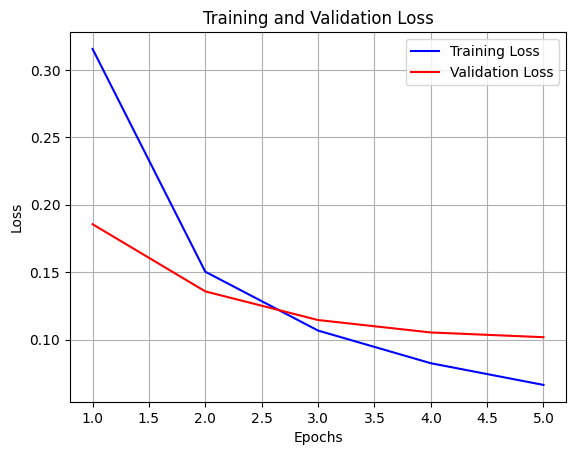

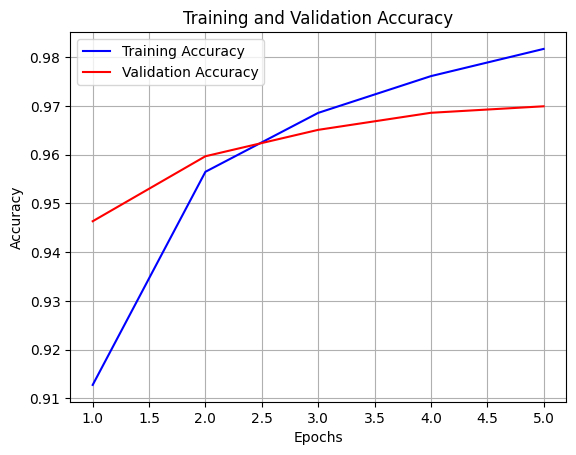

In [20]:
plot_metrics(base_model_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(base_model_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

In [21]:
# Evaluate the base model on the test set and extract the accuracy.
base_model_accuracy = base_model.evaluate(X_test, y_test_one_hot, verbose=0)[1]  

# Format and print the comparison of the base model accuracy to the naive baseline accuracy.
# Utilizes f-strings for clearer and more efficient string formatting.
print(f"(Accuracy (Validation Set): {base_model_accuracy * 100:.2f}%) "
      f"(Majority Class (Naive Baseline): {naive_baseline_accuracy * 100:.2f}%)")

(Accuracy (Validation Set): 97.13%) (Majority Class (Naive Baseline): 54.03%)


With this we can see that our base model satisfies both,
- achieving better statistical power than the baseline,
- having an accuracy > 10%.

Since these conditions have been satisfied, the earlier hypotheses have been proven that it is possible to predict the output using a given input as I believe there existed a predictive relationship and the data provided by Tensorflow was enough and provided sufficient information to learn the relationship between the inputs and outputs of the MNIST dataset.

## 7. Developing a model that overfits

The **Universal Workflow of Machine Learning**[<a href="#ref-dlwp">1</a>] then advises that the next important step is to create a Model that overfits the `train` split, even if it does not perform well on the `valid` split (overfitting scenario). Checking if the model we have created lies on the ideal cusp between overfitting and underfitting allows us to validate wheteher the model is sufficient. This can be done in 3 main ways:
1. Add Layers
2. Make the layers bigger
3. Train for more epochs

The training loss and validation loss will be monitored closely so that we can see when the model's performance on the validation data begins to degrade. This will mean that overfitting has been achived.

### 7.1 Adding Layers to the model and making the layers bigger

- **Flatten Layer**: This layer converts the 2D input of shape (28, 28) into a 1D array of size 784 (28*28). This is necessary because the following dense layers expect 1D input vectors. The input_shape parameter indicates the shape of the input data (excluding the batch size).

- **Dense Layers**: These are fully connected neural layers. The model includes four dense layers with decreasing units (128, 64, 48, 16) and ReLU (Rectified Linear Unit) activations. This decreasing pattern in units is an attempt to gradually reduce the dimensionality and abstract features before making predictions. The ReLU activation function is used to introduce non-linearity to the model, allowing it to learn more complex patterns.

- **Output Layer**: The final layer is another dense layer with 10 units, corresponding to the number of classes (assuming a classification problem with 10 classes). It uses a softmax activation function to output probabilities for each class, ensuring that the sum of these probabilities equals 1.

In [22]:
# Train the overfitted model w/ more layers
overfit_model = Sequential([
                Flatten(input_shape=(28, 28)),
                Dense(128, activation='relu'),
                Dense(64, activation='relu'),
                Dense(48, activation='relu'),
                Dense(16, activation='relu'),  
                Dense(10, activation='softmax')
], name='overfit_model')

overfit_model.summary()

Model: "overfit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,810 (440.66 KB)

 Trainable params: 112,810 (440.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
overfit_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 7.2 Adding More Epochs

More Epochs are then added to the model. The number of Epochs has increased from 5 to 20.

In [24]:
# Train the model w/ 20 epochs instead of 5
overfit_model_history = overfit_model.fit(X_train, y_train,
                 epochs=20, batch_size=64,
                 validation_data=(X_holdout, y_holdout))



Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8015 - loss: 0.6676 - val_accuracy: 0.9451 - val_loss: 0.1930
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9538 - loss: 0.1594 - val_accuracy: 0.9618 - val_loss: 0.1323
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1073 - val_accuracy: 0.9668 - val_loss: 0.1153
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0815 - val_accuracy: 0.9682 - val_loss: 0.1139
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0621 - val_accuracy: 0.9704 - val_loss: 0.1140
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.0498 - val_accuracy: 0.9691 - val_loss: 0.1259
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0407 - val_accuracy: 0.9687 - val_loss: 0.1382
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.

### 7.3 Evaluate the difference

In [25]:
# Evaluate the model on the validation set
test_loss, test_acc = overfit_model.evaluate(X_holdout, y_holdout)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9772 - loss: 0.2013
Validation Accuracy: 97.62%


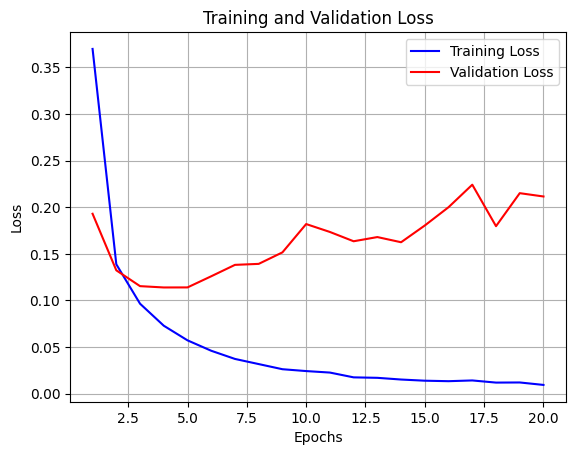

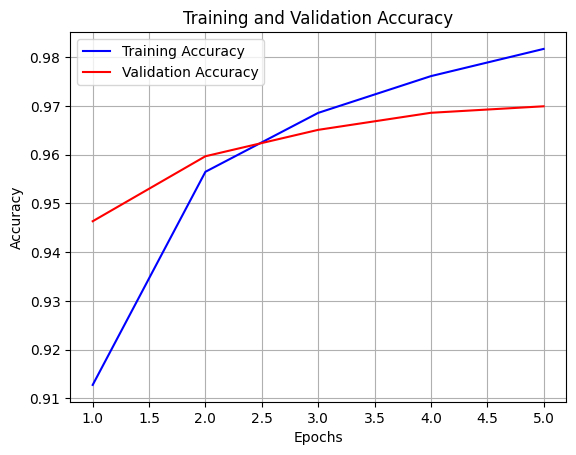

In [26]:
plot_metrics(overfit_model_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(base_model_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

By using the previously built plotting graphs, we can observe that this model with additional layers and epochs had a poor validation accuracy but a high training accuracy when compared to the original model. The model is memorizing the training data and is not performing well with unseen data, which is an indication of overfitting. This step has been successfully completed.

## 8. Regularizing the model and tuning the hyperparameters

Now that a base neural network model has been created aswell as a version of it that overfits, tuning the hyperparameters and regularization is the next (and last step) of the **Universal Workflow**[<a href="#ref-dlwp">1</a>]. The **Baseline Model** proves the lowerbound performance of the model, while the **Overfitting Model** provides the upperbound performance of the model using the `MNIST` dataset. This step is the most laborious step and includes modifying the model, training it, evaluating it on the validation data and then repeating the process again until the model is performing as well as it possibly can.

Hyperparameters can be adjusted during this portion of the report to achieve the most valid model for this dataste. This can be achieved by either adjusting either or all of the following properties of the model:

1. **Layer Dropout**: Randomly disabling perceptrons prevents any one perceptron from being<br />
   in charge of the most significant portion of a data representation, resulting in more robust representations</ br>
   that are less susceptible to overfitting; A regularization impact is also observed on the network when dropout for<br />
   layers is enabled (with a %) or disabled
   
2. **Model capacity (layers and units)**: Produces a model with a roughly sinuous function<br />
     Since sinuosity might result in overfitting, the model's size needs to be just right.

3. **Layer Regularisation**: Increased coefficients, which include weights and biases,<br />
    also characterize the degree of sinuousness in a function.By penalizing large coefficients,< br />
    we can create a model that transitions from one layer to the next more smoothly,<br />
    hence decreasing overfitting to the training data.

4. **Miscelleneous Hyperparam Tuning**: When you modify the structure of your model, it alters the landscape of potential< br />
    parameter combinations to explore. Consequently, navigating through this landscape requires adjusting the< br />
    hyperparameters used for exploration accordingly(units/layer, learning rate of the optimizer)

Making adjustments to the hyperparameters as described above brings about the following outcomes:

- When capacity is reduced, and regularization or dropout techniques are employed, there's a tendency for training accuracy to decrease. This indicates a reduction in the model's ability to effectively learn from the input data. Therefore, it becomes necessary to fine-tune the training process to restore the performance of the model to a level comparable to that of the overfitting model.

- Introducing regularization techniques delays the onset of overfitting to the training data until later epochs. Consequently, training might need to be extended over more epochs to allow the loss values for both training and validation data to converge over a longer period. This extended training period enables the validation accuracy to rise concurrently with the training accuracy, albeit at a slower pace.

- Lastly, exploring the parameter search space necessitates adjusting the learning rate $\alpha$. This adjustment enables the gradient descent algorithm to avoid getting stuck in local minima and instead converge towards deeper minima that correspond to higher accuracy levels.
  
These steps will help us develop a satisfactory model configuration, where both <a href='https://www.baeldung.com/cs/training-validation-loss-deep-learning'>validation and training loss</a> curves decrease and stabilize at a specific point.

### 8.1 Reducing Epochs (Model 1)

Since the base model achieved higher validation accuracy in fewer epochs, we aim to decrease the number of training epochs for the model and observe its impact on accuracy.

To facilitate this process, a function has been developed to identify the training epoch associated with the lowest validation loss. This function assists us in our endeavor.

In [27]:
def optimal_epoch(model_history):
    """
    Retrieve the epoch with the lowest validation loss
    
    input:
    model_history (dict): Training history of the model
    output:
    int: Epoch with the lowest validation loss
    """
    
    min_epoch = np.argmin(model_history['val_loss']) + 1
    print("Minimum validation loss reached in epoch no.: {}".format(min_epoch))
    return min_epoch

In [28]:
optimal = optimal_epoch(overfit_model_history.history)

Minimum validation loss reached in epoch no.: 4


In [29]:
# Define the model
model1 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(48, activation='relu'),
        Dense(16, activation='relu'),  
        Dense(10, activation='softmax')
], name='model_1')

# Print model summary
model1.summary()

# Compile the model
model1.compile(optimizer=RMSprop(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model with optimal number of epochs (optimal is assumed to be defined)
model1_history = model1.fit(X_train, y_train,
                            epochs=optimal, batch_size=64,
                            validation_data=(X_holdout, y_holdout)
                           )

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,810 (440.66 KB)

 Trainable params: 112,810 (440.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8080 - loss: 0.6384 - val_accuracy: 0.9420 - val_loss: 0.1947
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9526 - loss: 0.1597 - val_accuracy: 0.9590 - val_loss: 0.1349
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9693 - loss: 0.1066 - val_accuracy: 0.9645 - val_loss: 0.1280
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9773 - loss: 0.0787 - val_accuracy: 0.9634 - val_loss: 0.1413


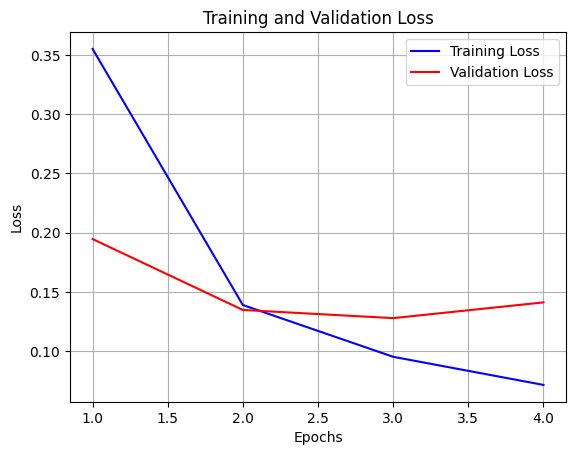

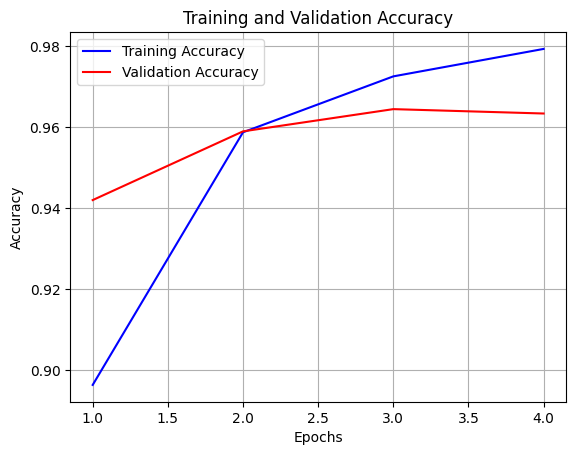

In [30]:
plot_metrics(model1_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(model1_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

In Model 1, reducing the total number of training epochs from 20 to 6 has resulted in a decrease in overfitting. However, it's evident that the loss curves have not yet reached a stable point.

### 8.2 Dropout Regularization (Model 2)

In our next model, following this strategy will involve excluding specific nodes in each layer during training. This technique, referred to as Dropout, is aimed at mitigating overfitting by ensuring that no units rely too heavily on one another. This is known as <a href="https://www.analyticsvidhya.com/blog/2022/08/dropout-regularization-in-deep-learning/">Dropout</a>

In [31]:
model2 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dropout(0.5), # Add dropout after first two dense layers
                    Dense(48, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
], name='model_2')

model2.summary()

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2_history = model2.fit(X_train, y_train,
                 epochs=optimal, batch_size=64,
                 validation_data=(X_holdout, y_holdout)
                )

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,810 (440.66 KB)

 Trainable params: 112,810 (440.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6929 - loss: 0.9374 - val_accuracy: 0.9399 - val_loss: 0.2011
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9260 - loss: 0.2722 - val_accuracy: 0.9572 - val_loss: 0.1518
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9457 - loss: 0.1944 - val_accuracy: 0.9604 - val_loss: 0.1438
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9561 - loss: 0.1664 - val_accuracy: 0.9675 - val_loss: 0.1245


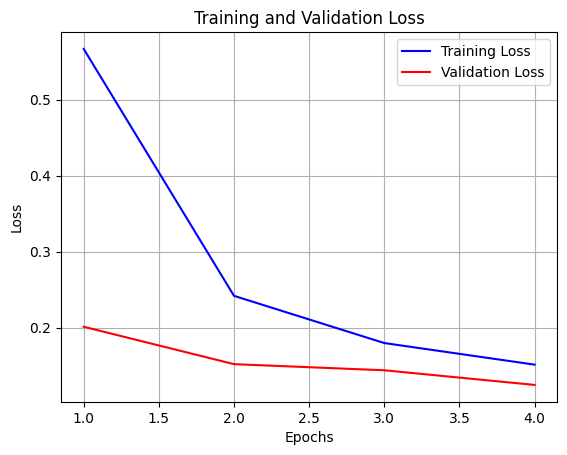

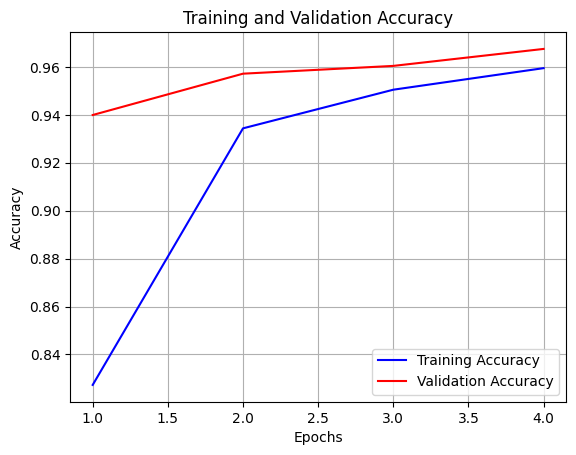

In [32]:
plot_metrics(model2_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(model2_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

By employing the optimal number of training epochs in conjunction with introducing a single dropout layer with a rate of 0.2, we successfully achieved convergence of the loss curves at the end of the graph.

### 8.3 L2 Regularization (Model 3)

In the next model,  a weight decay technique known as L2 regularization will be implemented. This method reduces the magnitude of each weight, thereby preventing any individual feature from exerting excessive influence on the model's predictions.

In [33]:
model3 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dropout(0.5), # Add dropout after first two dense layers
                    Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
], name='model_3')

model3.summary()

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3_history = model3.fit(X_train, y_train,
                 epochs=optimal, batch_size=64,
                 validation_data=(X_holdout, y_holdout)
                )

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,810 (440.66 KB)

 Trainable params: 112,810 (440.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6471 - loss: 2.2546 - val_accuracy: 0.9072 - val_loss: 0.7034
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8879 - loss: 0.7456 - val_accuracy: 0.9302 - val_loss: 0.5245
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9093 - loss: 0.5963 - val_accuracy: 0.9383 - val_loss: 0.4517
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9202 - loss: 0.5248 - val_accuracy: 0.9436 - val_loss: 0.4115


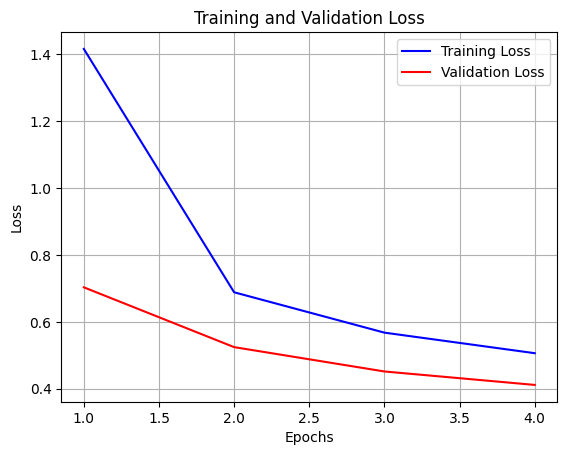

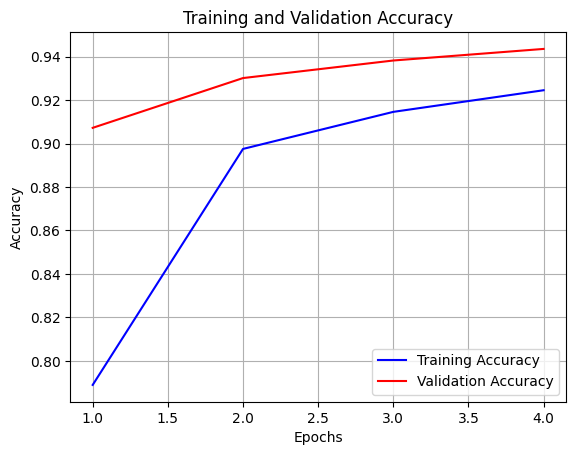

In [34]:
plot_metrics(model3_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(model3_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

Incorporating L2 regularization appears to have broadened the model's curve, suggesting that it might not be the most suitable regularization method for our specific scenario.

## 9. Conclusion

In summary, a satisfactory fit for the model was achieved, with both training and validation loss decreasing and stabilizing at a certain point.

Tuning the models to identify the best parameters was the most time-consuming aspect, as each training epoch took a considerable amount of time.

Although the precise parameters were attempted to be achieved, where both training and validation curves consistently stabilized, my attempts with various regularization methods still resulted in the model easily overfitting, even with minor adjustments.

After experimenting with different regularization methods and hyperparameter tuning, it was discovered that reducing the training epochs from 20 to 7 and incorporating a dropout rate of 0.5 yielded the best accuracy for the model.

Below are the findings comparing the base, overfitted, and optimal models.

### 9.1. Base Model Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9685 - loss: 0.1046
Validation Accuracy: 97.13%


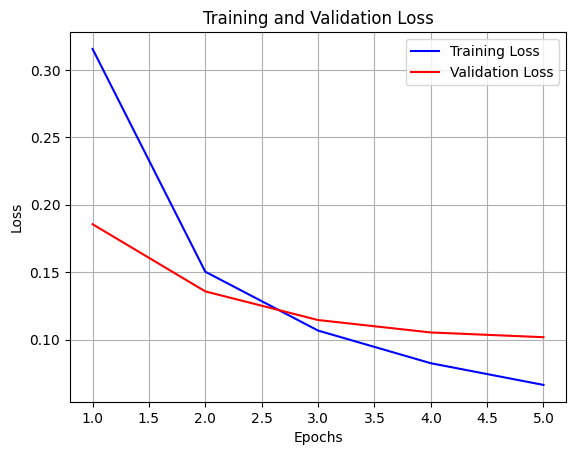

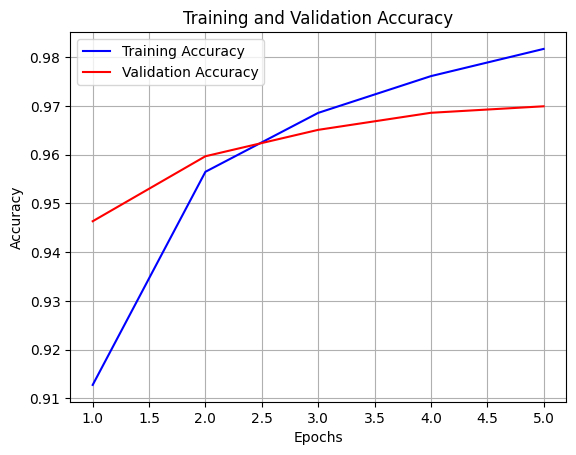

In [35]:
# Baseline
test_loss, test_acc = base_model.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_metrics(base_model_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(base_model_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

### 9.2 Overfit Model Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.2391
Validation Accuracy: 97.41%


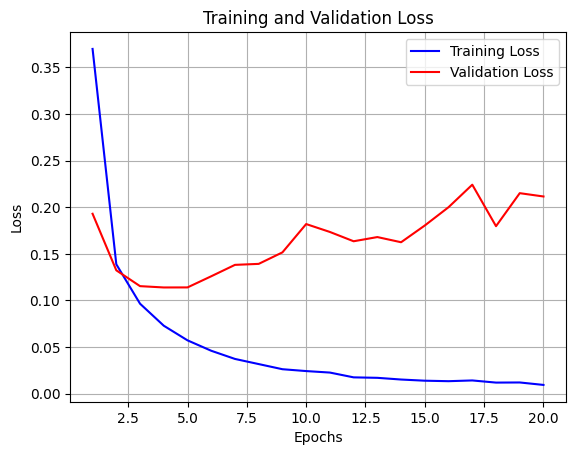

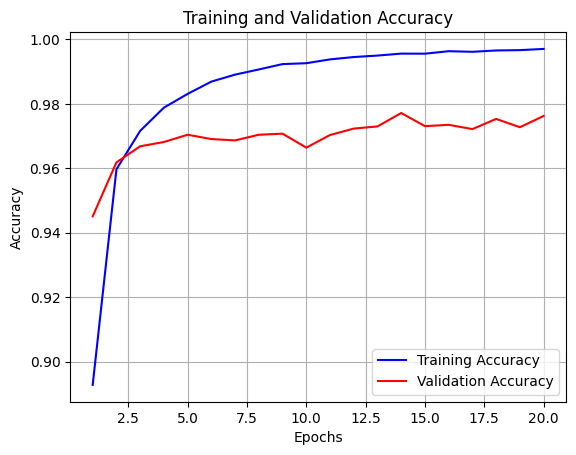

In [36]:
# Baseline
test_loss, test_acc = overfit_model.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_metrics(overfit_model_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(overfit_model_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

### 9.3 Final Model Results

The model that performed the best was model 2. Which achieved a Validation Accuracy of 96.67%.
- 7 Training Epochs,
- Dropout Rate of 0.5.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.1452
Validation Accuracy: 96.74%


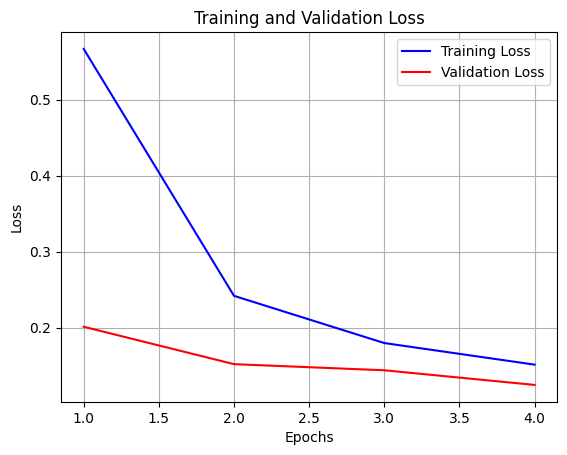

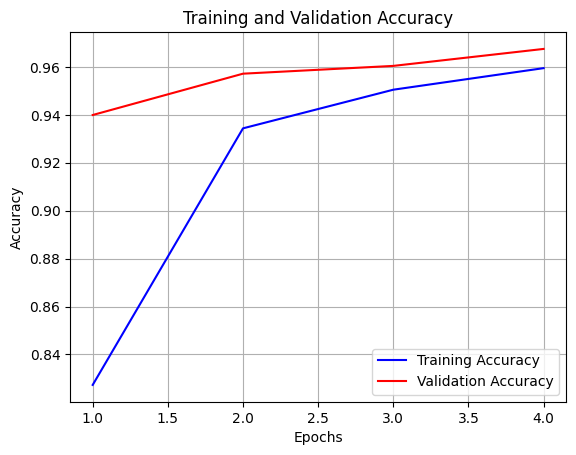

In [37]:
# Baseline
test_loss, test_acc = model2.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_metrics(model2_history, 'loss','Training and Validation Loss', 'Loss')
plot_metrics(model2_history, 'accuracy','Training and Validation Accuracy', 'Accuracy')

## 9. References

<a id="ref-dlwp"></a>
[1] Chollet, François. Deep Learning with Python. Manning, 2017.

<a id="ref-bayes"></a>
[2] Tumer, K., and J. Ghosh. ‘Estimating the Bayes Error Rate through Classifier Combining’. Proceedings of 13th International Conference on Pattern Recognition, vol. 2, 1996, pp. 695–699 vol.2, https://doi.org10.1109/ICPR.1996.546912.

<a id="ref-cwg-asotaoicbocnn"></a>
[3] Chen, Yifan, et al. ‘A Survey on the Applications of Image Classification Based on Convolution Neural Network’. 2022 IEEE Asia-Pacific Conference on Image Processing, Electronics and Computers (IPEC), 2022, pp. 381–384, https://doi.org10.1109/IPEC54454.2022.9777354.

<a id="ref-mnist"></a>
[4] LeCun, Yann, Corinna Cortes, and Christopher J.C. Burges. "MNIST handwritten digit database." (2010).

<a id="ref-data_aug"></a>
[5] Yang, Suorong, et al. Image Data Augmentation for Deep Learning: A Survey. arXiv, 2022, https://doi.org10.48550/ARXIV.2204.08610.
